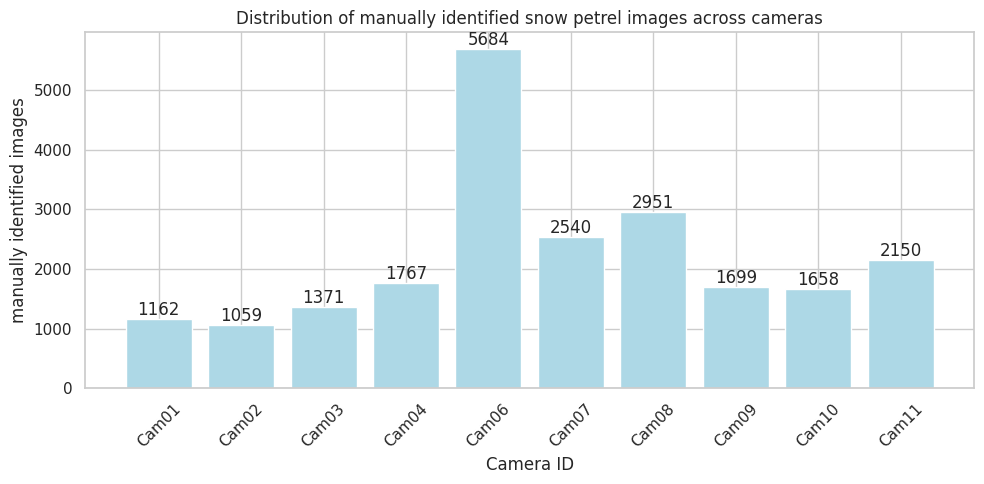

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Camera ID': ['Cam01', 'Cam02', 'Cam03', 'Cam04', 'Cam06', 'Cam07', 'Cam08', 'Cam09', 'Cam10', 'Cam11'],
    'Count of Non-Blank Images': [1162, 1059, 1371, 1767, 5684, 2540, 2951, 1699, 1658, 2150]
}

df = pd.DataFrame(data)
plt.figure(figsize=(10, 5))
bars = plt.bar(df['Camera ID'], df['Count of Non-Blank Images'], color='lightblue')

plt.xlabel('Camera ID')
plt.ylabel('manually identified images')
plt.title('Distribution of manually identified snow petrel images across cameras')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


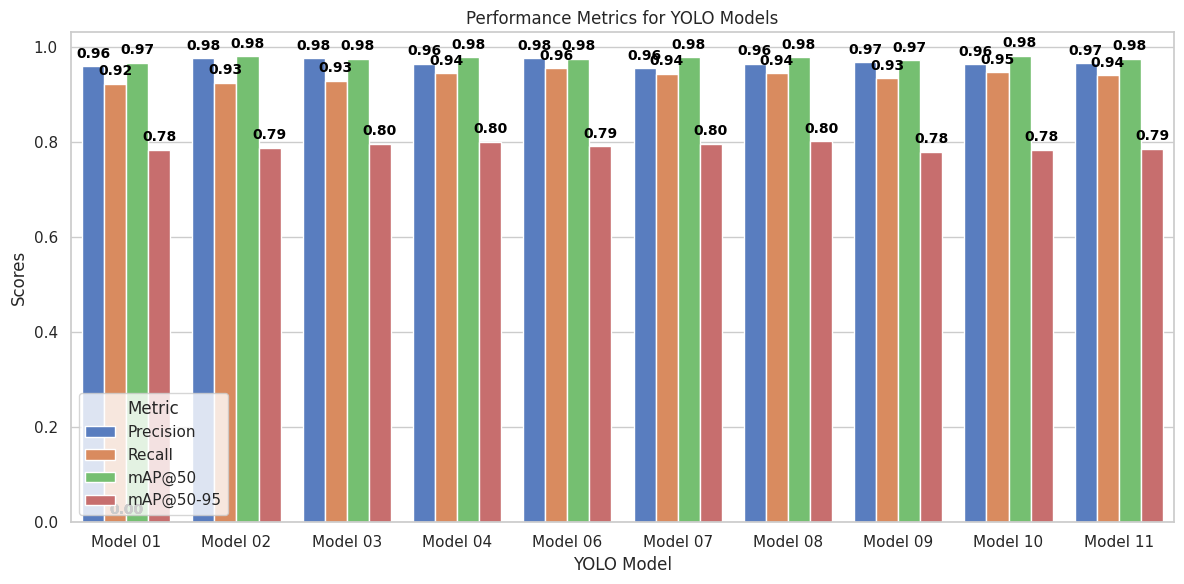

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


models = ['Model 01', 'Model 02', 'Model 03', 'Model 04', 'Model 06', 'Model 07',
          'Model 08', 'Model 09', 'Model 10', 'Model 11']
precision = [0.96018, 0.97626, 0.97693, 0.9649, 0.97624, 0.95505,
             0.9649, 0.9684, 0.96348, 0.96555]
recall = [0.92297, 0.92545, 0.92876, 0.94477, 0.95535, 0.94378,
          0.94477, 0.93466, 0.94732, 0.94081]
map50 = [0.96686, 0.98028, 0.97558, 0.97818, 0.9759, 0.97863,
         0.97818, 0.97284, 0.98201, 0.97543]
map50_95 = [0.7844, 0.78769, 0.79624, 0.80131, 0.79124, 0.79714,
            0.80137, 0.77934, 0.78352, 0.78597]

data = pd.DataFrame({
    'Model': models * 4,
    'Metric': ['Precision'] * 10 + ['Recall'] * 10 + ['mAP@50'] * 10 + ['mAP@50-95'] * 10,
    'Score': precision + recall + map50 + map50_95
})


sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='Score', hue='Metric', data=data, palette='muted')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10, color='black', weight='bold')


plt.title('Performance Metrics for YOLO Models')
plt.xlabel('YOLO Model')
plt.ylabel('Scores')
plt.legend(title='Metric', loc='lower left')
plt.tight_layout()
plt.show()


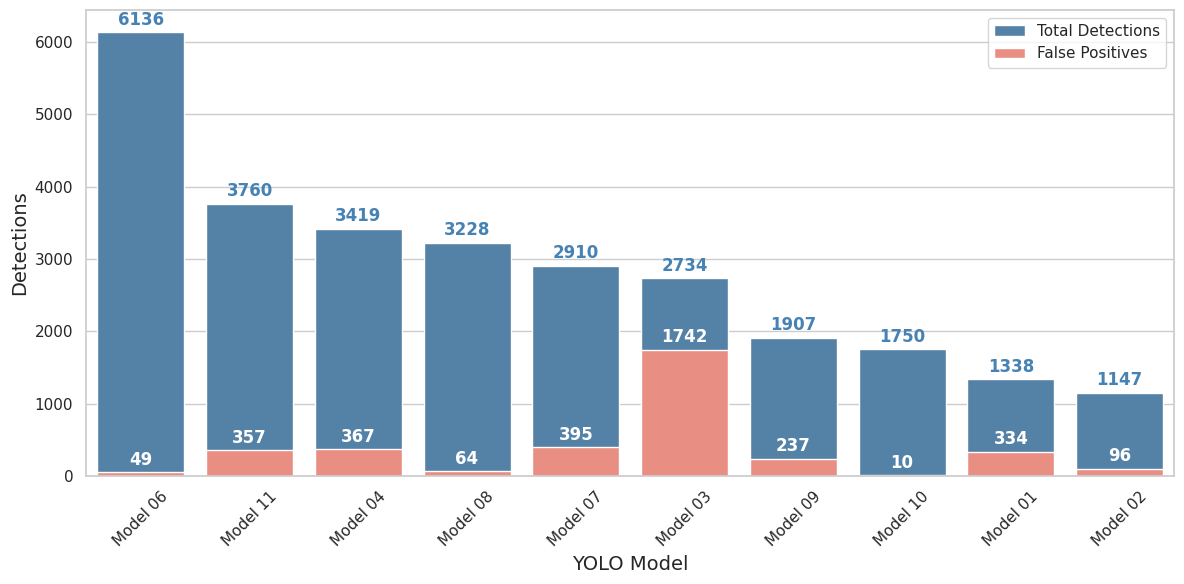

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
model_output_path = '/content/Model-Output.csv'
false_detections_path = '/content/False-Detections.csv'

model_df = pd.read_csv(model_output_path)
false_df = pd.read_csv(false_detections_path)


total_detections = model_df['Camera_Numbers'].value_counts().reset_index()
total_detections.columns = ['Camera_Numbers', 'Total_Detections']
false_detections = false_df['Camera_Numbers'].value_counts().reset_index()
false_detections.columns = ['Camera_Numbers', 'False_Detections']
combined_df = pd.merge(total_detections, false_detections, on='Camera_Numbers', how='left')
combined_df = combined_df.fillna(0)
combined_df['Camera_Numbers'] = combined_df['Camera_Numbers'].apply(lambda x: f'Model {int(x.replace("Cam", "")):02d}')
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
barplot_total = sns.barplot(x=combined_df['Camera_Numbers'], y=combined_df['Total_Detections'], color="steelblue", label='Total Detections')
barplot_false = sns.barplot(x=combined_df['Camera_Numbers'], y=combined_df['False_Detections'], color="salmon", label='False Positives')
for index, value in enumerate(combined_df['Total_Detections']):
    barplot_total.text(index, value + 50, f'{int(value)}', ha='center', va='bottom', color='steelblue', fontweight='bold')

for index, value in enumerate(combined_df['False_Detections']):
    barplot_false.text(index, value + 50, f'{int(value)}', ha='center', va='bottom', color='white', fontweight='bold')

plt.xlabel('YOLO Model', fontsize=14)
plt.ylabel('Detections', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


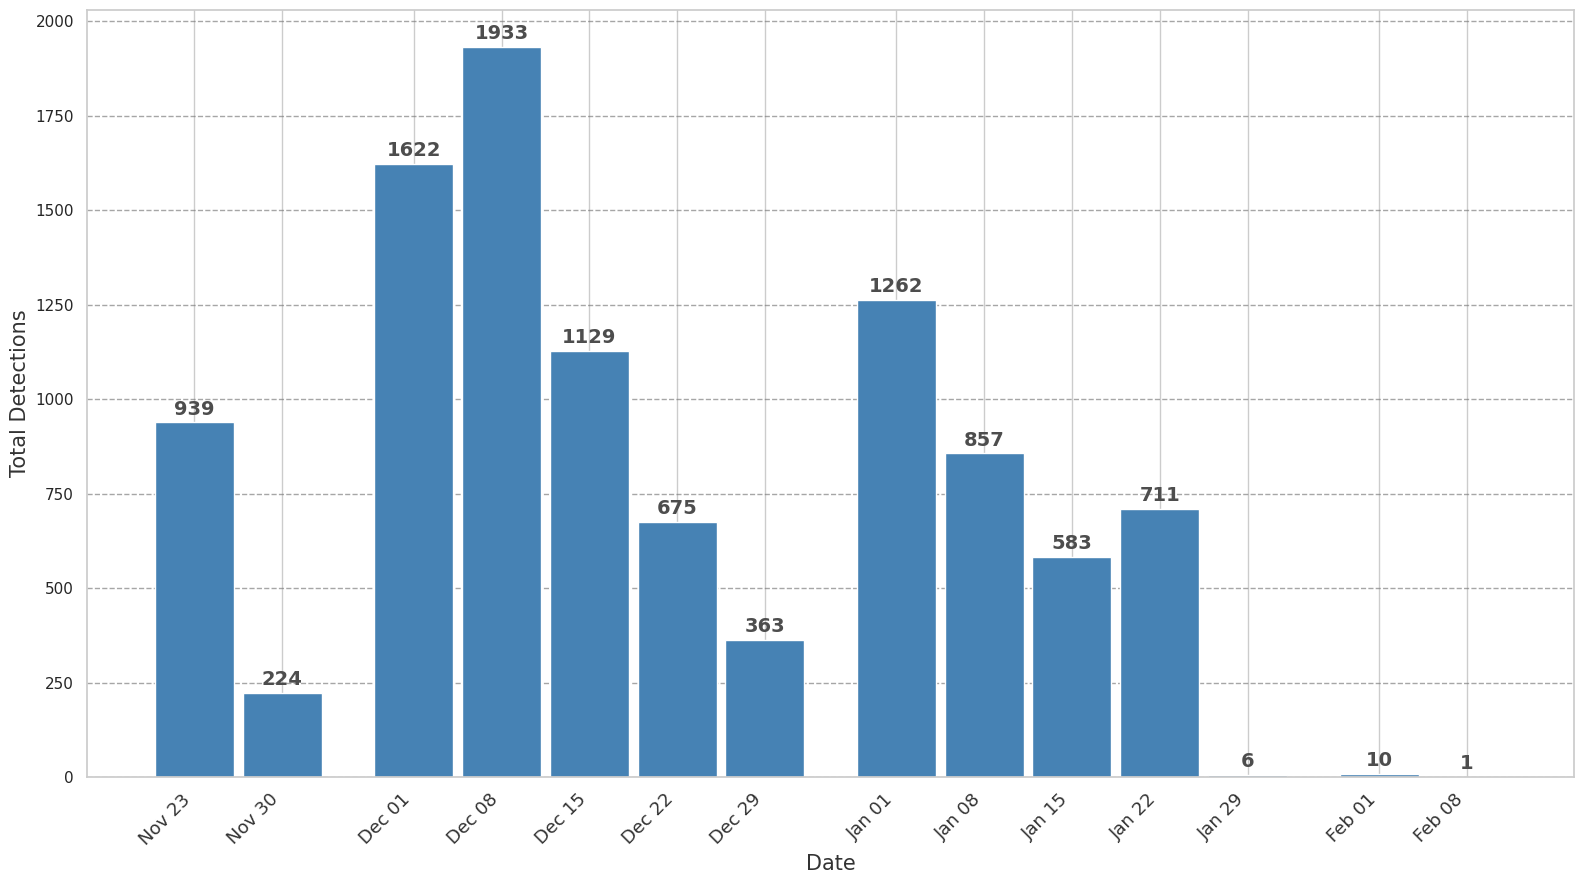

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for Seaborn
sns.set(style="whitegrid")

# Load the data
file_path = '/content/Final-Output.csv'
df = pd.read_csv(file_path)
df['Dates'] = pd.to_datetime(df['Dates'])
df.set_index('Dates', inplace=True)
weekly_totals_nov = df['Bird_Number']['2022-11'].resample('7D', origin='start').count()
weekly_totals_dec = df['Bird_Number']['2022-12'].resample('7D', origin='start').count()
weekly_totals_jan = df['Bird_Number']['2023-01'].resample('7D', origin='start').count()
weekly_totals_feb = df['Bird_Number']['2023-02'].resample('7D', origin='start').count()
weekly_totals_combined = pd.concat([weekly_totals_nov, weekly_totals_dec, weekly_totals_jan, weekly_totals_feb])
week_labels = weekly_totals_combined.index.strftime('%b %d').tolist()
positions = np.arange(len(weekly_totals_combined), dtype=float)
positions[2:] += 0.5
positions[7:] += 0.5
positions[12:] += 0.5

fig, ax = plt.subplots(figsize=(16, 9))
bars = ax.bar(positions, weekly_totals_combined, color='#4682B4', width=0.9, label='Weekly Detections')
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 10, f'{int(height)}', ha='center', va='bottom', fontsize=14, fontweight='bold', color='#4D4D4D')

ax.set_xticks(positions)
ax.set_xticklabels(week_labels, rotation=45, ha='right', fontsize=13, color='#333333')
ax.set_xlabel('Date', fontsize=15,  color='#333333')
ax.set_ylabel('Total Detections', fontsize=15, color='#333333')
ax.grid(True, which='major', axis='y', linestyle='--', color='gray', alpha=0.7)
plt.tight_layout()
plt.show()


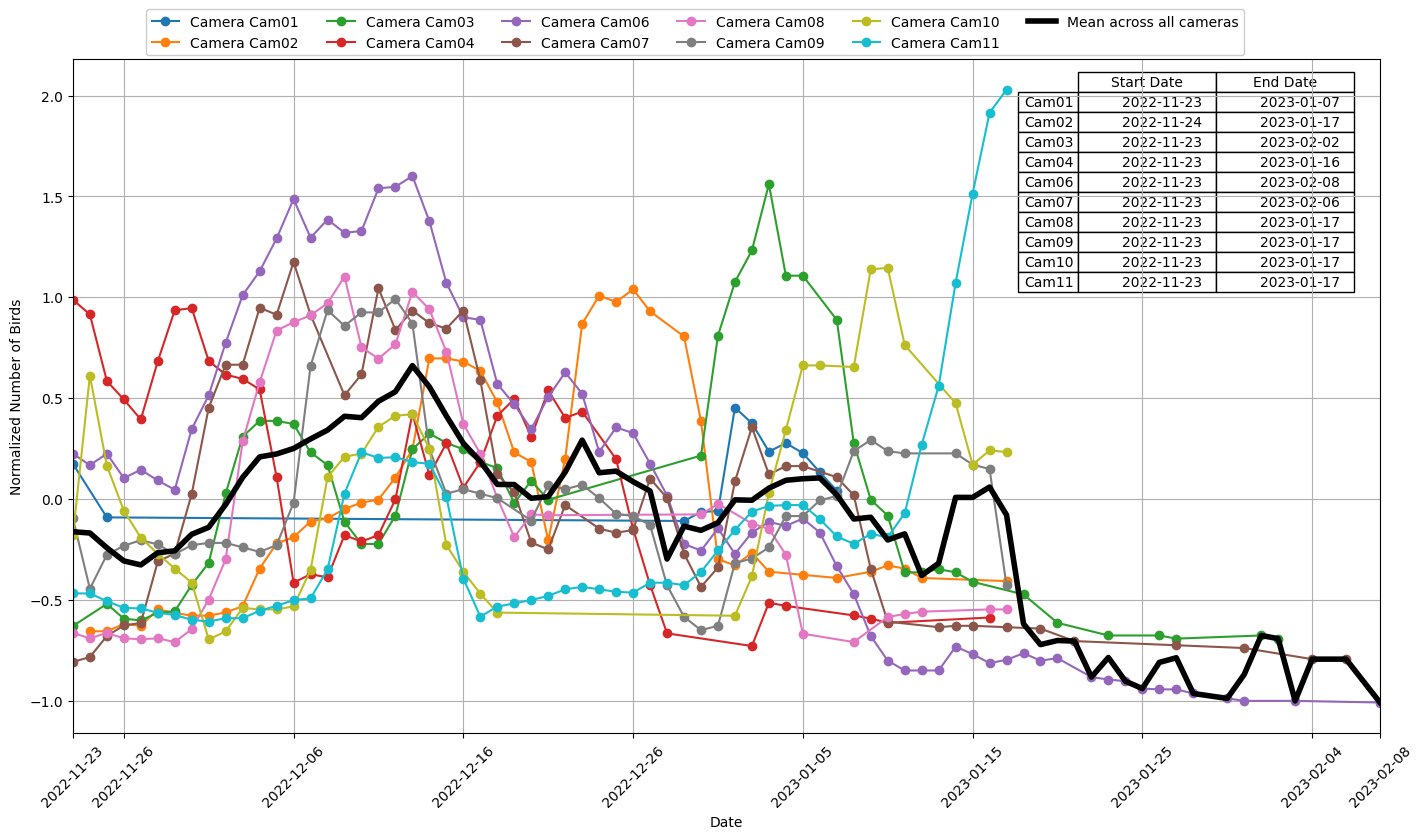

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates


file_path = '/content/Updated-Final-Output.csv'
df = pd.read_csv(file_path)
df['Dates'] = pd.to_datetime(df['Dates'])
camera_counts = df.groupby(['Dates', 'Camera_Numbers'])['Bird_Number'].sum().reset_index()
camera_normalized = camera_counts.groupby('Camera_Numbers')['Bird_Number'].transform(lambda x: (x - x.mean()) / x.std())
camera_counts['Normalized_Bird_Number'] = camera_normalized
camera_counts['Smoothed_Bird_Number'] = camera_counts.groupby('Camera_Numbers')['Normalized_Bird_Number'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
camera_counts_excl_cam3 = camera_counts[camera_counts['Camera_Numbers'] != 3]
mean_smoothed_birds_excl_camera3 = camera_counts_excl_cam3.groupby('Dates')['Smoothed_Bird_Number'].mean().reset_index()

camera_activity_periods = {}
for camera, group in df.groupby('Camera_Numbers'):
    start_date = group['Dates'].min()
    end_date = group['Dates'].max()
    camera_activity_periods[camera] = (start_date, end_date)


fig, ax = plt.subplots(figsize=(14, 8))

for camera, group in camera_counts.groupby('Camera_Numbers'):
    ax.plot(group['Dates'], group['Smoothed_Bird_Number'], marker='o', label=f'Camera {camera}')
ax.plot(mean_smoothed_birds_excl_camera3['Dates'], mean_smoothed_birds_excl_camera3['Smoothed_Bird_Number'],
        color='black', linestyle='-', linewidth=4, label='Mean across all cameras')

ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_xlim(camera_counts['Dates'].min(), camera_counts['Dates'].max())

plt.xticks(rotation=45)
activity_data = {camera: [period[0].strftime('%Y-%m-%d'), period[1].strftime('%Y-%m-%d')] for camera, period in camera_activity_periods.items()}
activity_df = pd.DataFrame(activity_data, index=['Start Date', 'End Date']).T
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Number of Birds')
ax.grid(True)
plt.tight_layout()
fig.legend(loc='upper center', fontsize=10, bbox_to_anchor=(0.5, 1.052), fancybox=True, framealpha=1, ncol=6)

table = plt.table(cellText=activity_df.values,
                  colLabels=activity_df.columns,
                  rowLabels=activity_df.index,
                  loc='upper right',
                  colWidths=[0.088]*len(activity_df.columns))
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

first_date = camera_counts['Dates'].min()
last_date = camera_counts['Dates'].max()
plt.xticks(list(plt.xticks()[0]) + [mdates.date2num(first_date), mdates.date2num(last_date)])
plt.show()


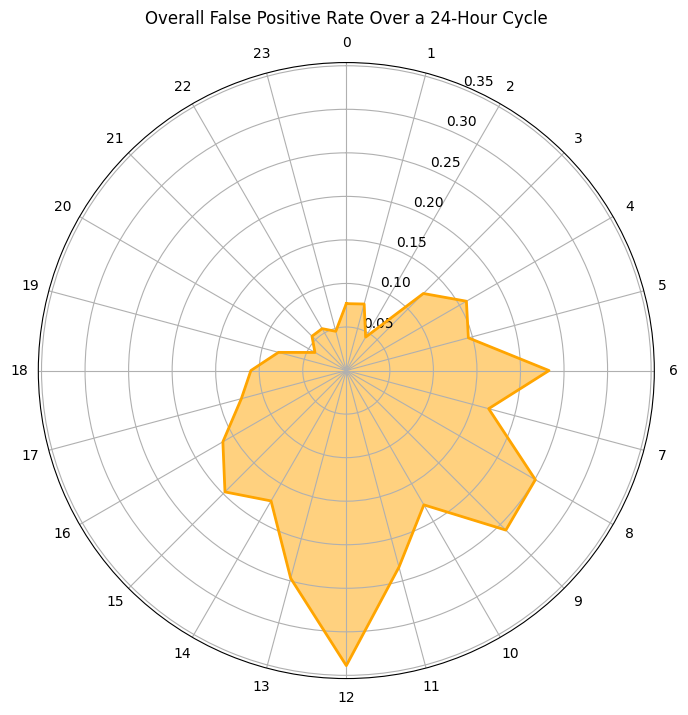

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


activity_file_path = '/content/Model-Output.csv'
activity_data = pd.read_csv(activity_file_path)
activity_df = pd.DataFrame(activity_data)

activity_df['Datetime'] = pd.to_datetime(activity_df['Dates'] + ' ' + activity_df['Times'])
activity_df['Hour'] = activity_df['Datetime'].dt.hour
total_activity_counts = activity_df.groupby(['Hour']).size()
false_positive_file_path = '/content/False-Detections.csv'
false_positive_data = pd.read_csv(false_positive_file_path)
false_positive_df = pd.DataFrame(false_positive_data)
false_positive_df['Datetime'] = pd.to_datetime(false_positive_df['Dates'] + ' ' + false_positive_df['Times'])
false_positive_df['Hour'] = false_positive_df['Datetime'].dt.hour
false_positive_counts = false_positive_df.groupby(['Hour']).size()
overall_false_positive_rates = false_positive_counts / total_activity_counts
angles = np.linspace(0, 2 * np.pi, overall_false_positive_rates.shape[0] + 1, endpoint=True)
overall_false_positive_rates = overall_false_positive_rates.to_list() + [overall_false_positive_rates.iloc[0]]
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.fill(angles, overall_false_positive_rates, alpha=0.5, color='orange')
ax.plot(angles, overall_false_positive_rates, linewidth=2, color='orange')
ax.set_xticks(angles[:-1])
ax.set_xticklabels(range(24))
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title('Overall False Positive Rate Over a 24-Hour Cycle', va='bottom')
plt.show()


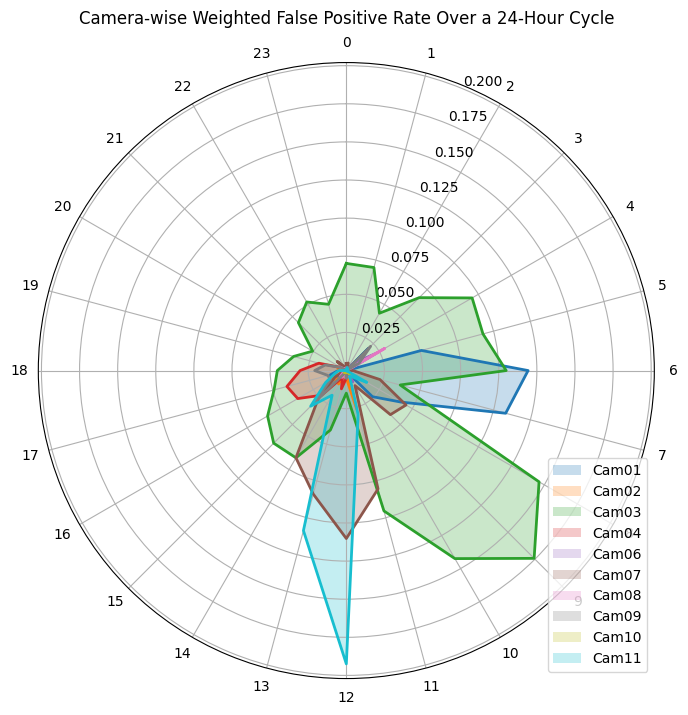

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

activity_file_path = '/content/Model-Output.csv'
activity_data = pd.read_csv(activity_file_path)
activity_df = pd.DataFrame(activity_data)
activity_df['Datetime'] = pd.to_datetime(activity_df['Dates'] + ' ' + activity_df['Times'])
activity_df['Hour'] = activity_df['Datetime'].dt.hour
total_activity_counts = activity_df.groupby(['Camera_Numbers', 'Hour']).size().unstack(fill_value=0)
false_positive_file_path = '/content/False-Detections.csv'
false_positive_data = pd.read_csv(false_positive_file_path)
false_positive_df = pd.DataFrame(false_positive_data)


false_positive_df['Datetime'] = pd.to_datetime(false_positive_df['Dates'] + ' ' + false_positive_df['Times'])
false_positive_df['Hour'] = false_positive_df['Datetime'].dt.hour

false_positive_counts = false_positive_df.groupby(['Camera_Numbers', 'Hour']).size().unstack(fill_value=0)
false_positive_rates = false_positive_counts / total_activity_counts
weighted_false_positive_rates = pd.DataFrame(index=false_positive_rates.index, columns=false_positive_rates.columns)

for hour in false_positive_rates.columns:
    total_activity_per_hour = total_activity_counts[hour].sum()
    if total_activity_per_hour > 0:
        weighted_false_positive_rates[hour] = (false_positive_counts[hour] / total_activity_counts[hour]) * (total_activity_counts[hour] / total_activity_counts[hour].sum())

weighted_false_positive_rates = weighted_false_positive_rates.fillna(0)
angles = np.linspace(0, 2 * np.pi, weighted_false_positive_rates.shape[1] + 1, endpoint=True)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for camera in weighted_false_positive_rates.index:
    values = weighted_false_positive_rates.loc[camera].to_list() + [weighted_false_positive_rates.loc[camera].iloc[0]]
    ax.fill(angles, values, alpha=0.25, label=camera)
    ax.plot(angles, values, linewidth=2)


ax.set_xticks(angles[:-1])
ax.set_xticklabels(range(24))
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title('Camera-wise Weighted False Positive Rate Over a 24-Hour Cycle', va='bottom')
ax.legend(loc='lower right')
plt.show()


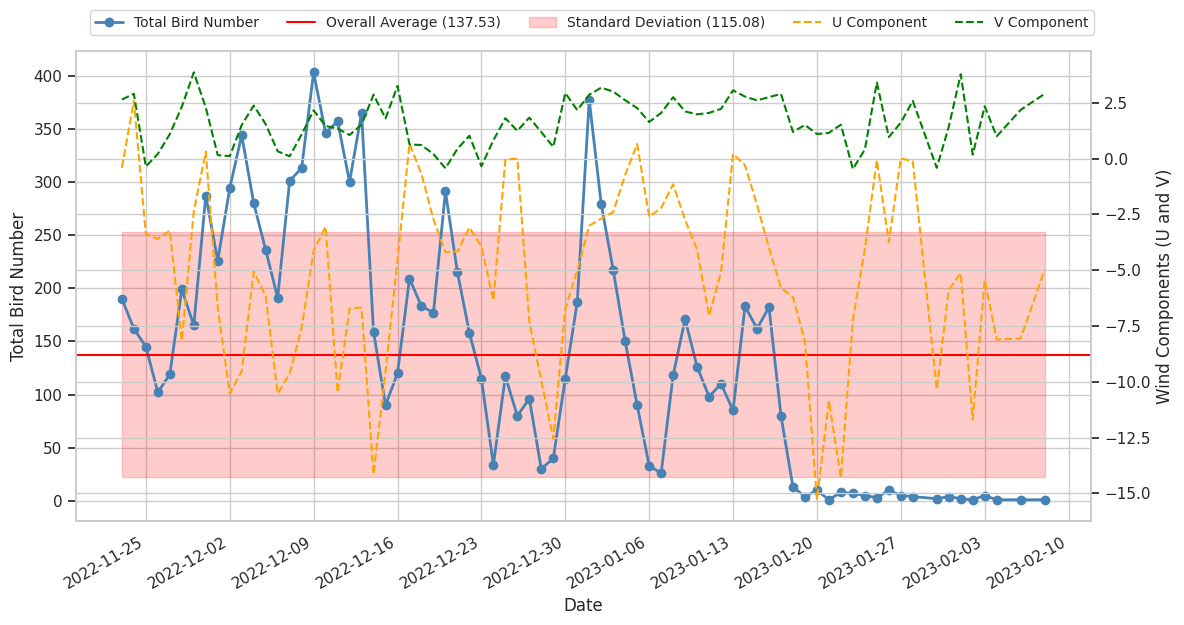

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


file_path = '/content/UPDATED_FINAL_OUTPUT_WIND.csv'
df = pd.read_csv(file_path)
df['Dates'] = pd.to_datetime(df['Dates'])
bird_counts = df.groupby('Dates').agg({
    'Bird_Number': 'sum',
    'u': 'mean',
    'v': 'mean'
}).reset_index()


average_birds_per_day = bird_counts['Bird_Number'].mean()
std_birds_per_day = bird_counts['Bird_Number'].std()
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(bird_counts['Dates'], bird_counts['Bird_Number'], marker='o', label='Total Bird Number', color='steelblue', linewidth=2)
ax1.axhline(y=average_birds_per_day, color='red', linestyle='-', label=f'Overall Average ({average_birds_per_day:.2f})')
ax1.fill_between(
    bird_counts['Dates'],
    average_birds_per_day - std_birds_per_day,
    average_birds_per_day + std_birds_per_day,
    color='red',
    alpha=0.2,
    label=f'Standard Deviation ({std_birds_per_day:.2f})'
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Bird Number')
ax1.grid(True)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
ax2 = ax1.twinx()
ax2.plot(bird_counts['Dates'], bird_counts['u'], color='orange', linestyle='--', label='U Component')
ax2.plot(bird_counts['Dates'], bird_counts['v'], color='green', linestyle='--', label='V Component')
ax2.set_ylabel('Wind Components (U and V)')
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=5, fontsize=10)
plt.tight_layout()
plt.show()


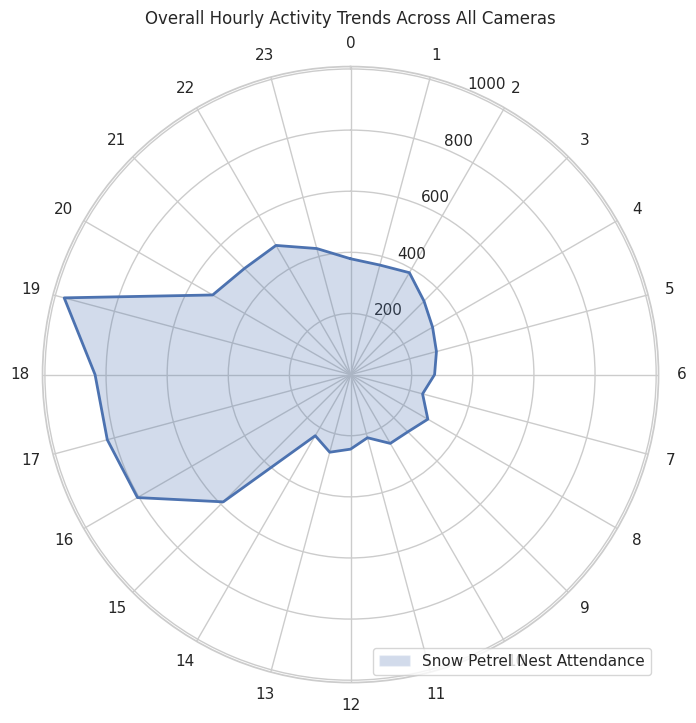

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


file_path = '/content/Final-Output.csv'
data = pd.read_csv(file_path)
df = pd.DataFrame(data)
df['Datetime'] = pd.to_datetime(df['Dates'] + ' ' + df['Times'])
df['Hour'] = df['Datetime'].dt.hour
activity_counts = df.groupby('Hour').size()
angles = np.linspace(0, 2 * np.pi, activity_counts.shape[0] + 1, endpoint=True).tolist()
activity_counts = pd.concat([activity_counts, pd.Series(activity_counts.iloc[0])], ignore_index=True)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, activity_counts.values, alpha=0.25, label='Snow Petrel Nest Attendance')
ax.plot(angles, activity_counts.values, linewidth=2)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(activity_counts.index[:-1])
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

ax.set_title('Overall Hourly Activity Trends Across All Cameras', va='bottom')

plt.legend(loc='lower right')
plt.show()


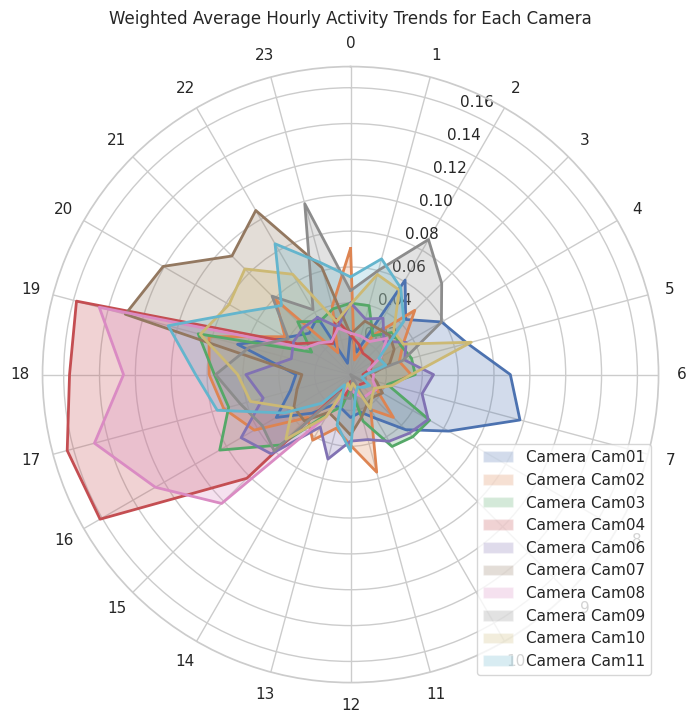

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


file_path = '/content/Final-Output.csv'
data = pd.read_csv(file_path)
df = pd.DataFrame(data)
df['Datetime'] = pd.to_datetime(df['Dates'] + ' ' + df['Times'])
df['Hour'] = df['Datetime'].dt.hour
activity_counts = df.groupby(['Camera_Numbers', 'Hour']).size().unstack(fill_value=0)
angles = np.linspace(0, 2 * np.pi, activity_counts.shape[1], endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for camera in activity_counts.index:
    total_photos = activity_counts.loc[camera].sum()
    weighted_activity = activity_counts.loc[camera] / total_photos
    values = weighted_activity.tolist()
    values += values[:1]
    ax.fill(angles, values, alpha=0.25, label=f'Camera {camera}')
    ax.plot(angles, values, linewidth=2)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(activity_counts.columns)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title('Weighted Average Hourly Activity Trends for Each Camera', va='bottom')
ax.legend(loc='lower right')
plt.show()


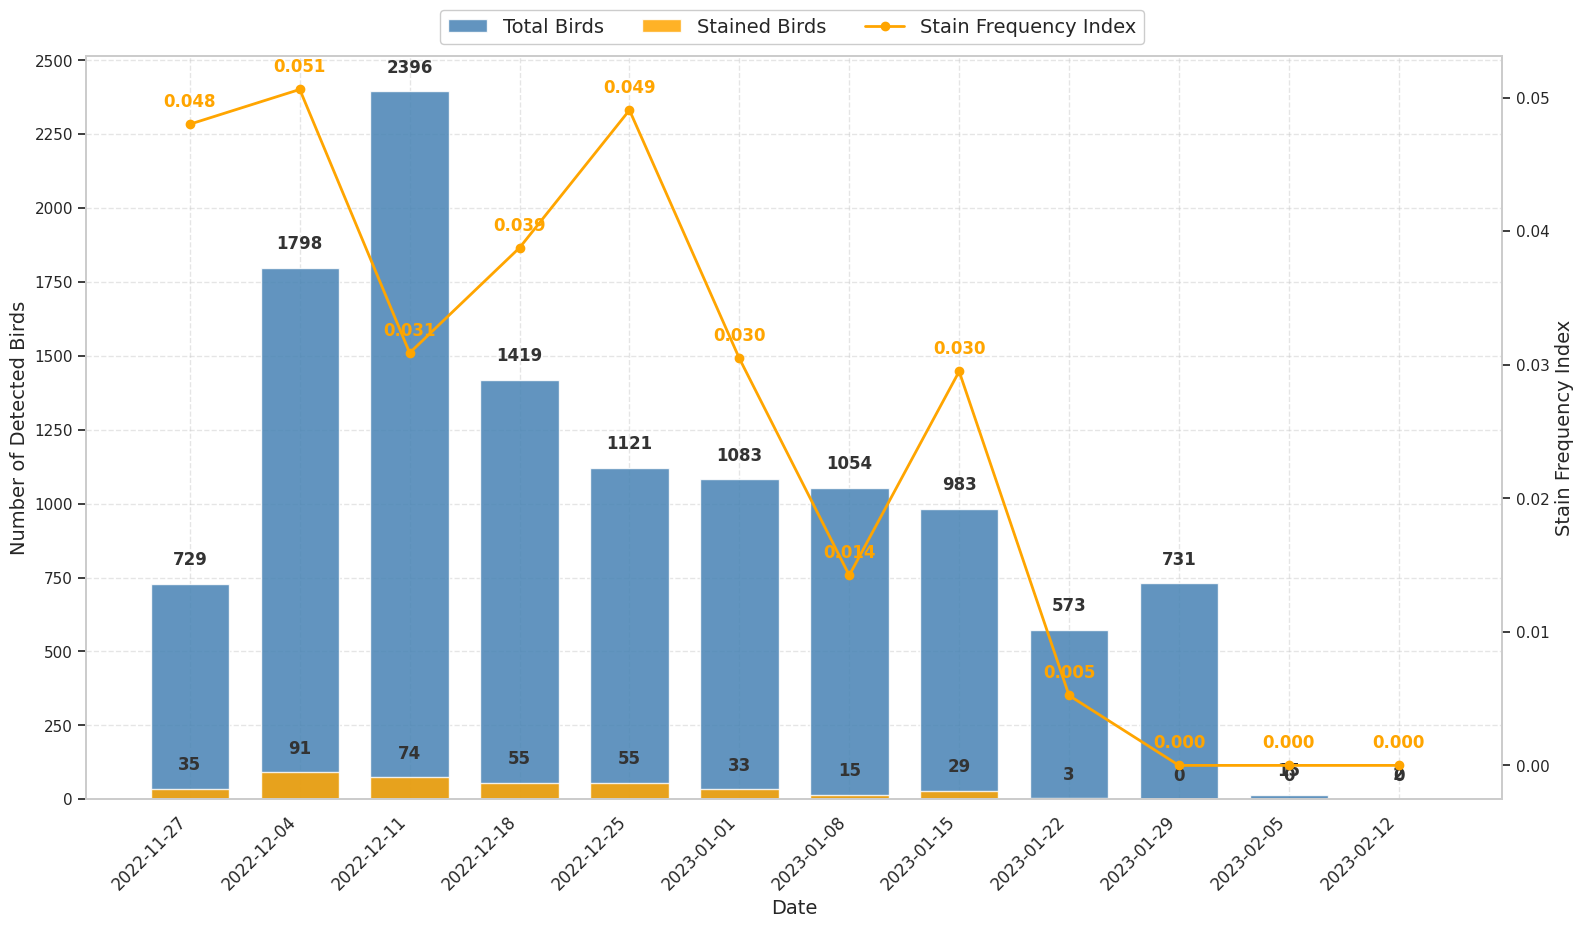

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator # import the MaxNLocator class from matplotlib.ticker

df_newest = pd.read_csv('/content/comprehsine_burst_processed.csv')


df_newest['Stain1'].fillna(0, inplace=True)
df_newest['Stain1'] = df_newest['Stain1'].astype(int)
df_newest['Stain_Frequency_Index'] = df_newest['Stain1'] / df_newest['Bird_Number']
df_newest['Date'] = pd.to_datetime(df_newest['Dates'])
df_newest.set_index('Date', inplace=True)
weekly_total_birds = df_newest['Bird_Number'].resample('W').sum()
weekly_total_stained_birds = df_newest['Stain1'].resample('W').sum()
weekly_stain_index = df_newest['Stain_Frequency_Index'].resample('W').mean()

weekly_stain_index = (weekly_total_stained_birds / weekly_total_birds).fillna(0)


fig, ax1 = plt.subplots(figsize=(16, 9))


bars1 = ax1.bar(weekly_total_birds.index, weekly_total_birds, width=5, label='Total Birds', alpha=0.85, color='steelblue')
bars2 = ax1.bar(weekly_total_stained_birds.index, weekly_total_stained_birds, width=5, label='Stained Birds', alpha=0.85, color='#FFA500')


for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 50, f'{int(height)}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='#333333')

for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 50, f'{int(height)}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='#333333')

ax2 = ax1.twinx()
line, = ax2.plot(weekly_stain_index.index, weekly_stain_index, color='orange', marker='o', linestyle='-', linewidth=2, label='Stain Frequency Index')
for i, value in enumerate(weekly_stain_index):
    ax2.text(weekly_stain_index.index[i], value + 0.0013, f'{value:.3f}', ha='center', va='baseline', fontsize=12, color='orange', fontweight='bold')

ax1.set_xticks(weekly_total_birds.index)
ax1.set_xticklabels(weekly_total_birds.index.strftime('%Y-%m-%d'), rotation=45, ha='right', fontsize=12)
ax1.set_yticks(MaxNLocator(integer=True).tick_values(0, max(weekly_total_birds))) # Use MaxNLocator
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Number of Detected Birds', fontsize=14)
ax2.set_ylabel('Stain Frequency Index', fontsize=14)


ax1.grid(True, linestyle='--', alpha=0.5)
ax2.grid(False)
ax1.set_title('', fontsize=18)
fig.legend(loc='upper center', fontsize=14, bbox_to_anchor=(0.5, 1.04), fancybox=True, framealpha=1, ncol=3)
plt.tight_layout()
plt.show()

<ipython-input-10-646b05005bc3>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['Times'] = pd.to_datetime(merged_df['Times'])


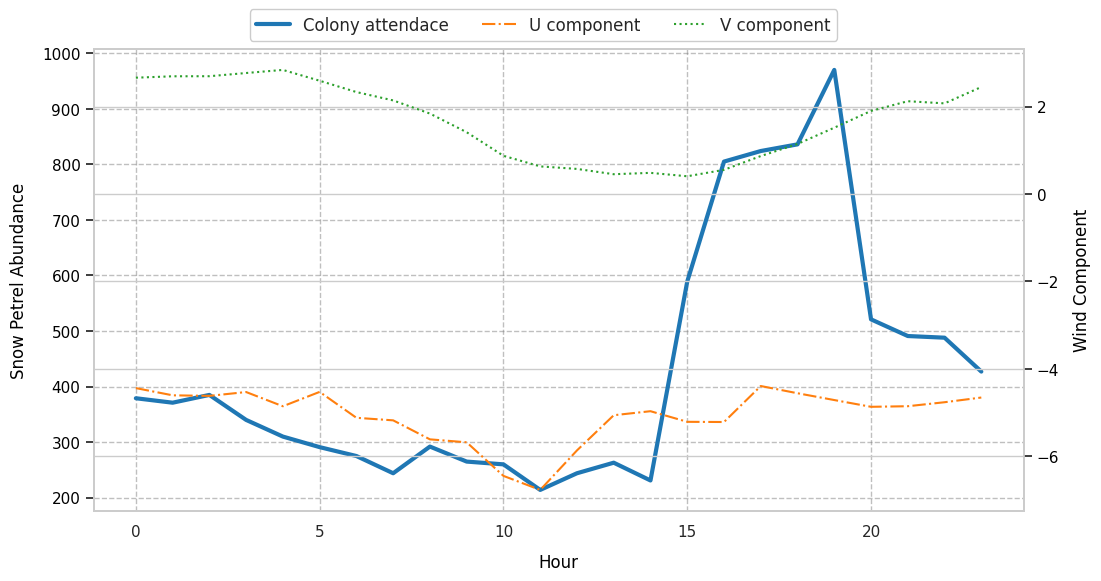

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

merged_output_file_path = '/content/merged_output.csv'
merged_df = pd.read_csv(merged_output_file_path)
merged_df['Times'] = pd.to_datetime(merged_df['Times'])
hourly_summary = merged_df.groupby(merged_df['Times'].dt.hour).agg(
    Bird_Count=('Bird_Number', 'count'),
    u=('u', 'mean'),
    v=('v', 'mean')
).reset_index()


hourly_summary = hourly_summary.rename(columns={'Times': 'Hour_of_Day'})
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Hour', fontsize=12, labelpad=10, color='black')
ax1.set_ylabel('Snow Petrel Abundance', color='black', fontsize=12, labelpad=10)
ax1.plot(hourly_summary['Hour_of_Day'], hourly_summary['Bird_Count'], color='tab:blue', linewidth=3, label='Colony attendace')
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()
ax2.set_ylabel('Wind Component', color='black', fontsize=12, labelpad=10)
ax2.plot(hourly_summary['Hour_of_Day'], hourly_summary['u'], color='tab:orange', linestyle='-.', label='U component')
ax2.plot(hourly_summary['Hour_of_Day'], hourly_summary['v'], color='tab:green', linestyle=':', label='V component')
ax2.tick_params(axis='y', labelcolor='black')
ax1.grid(True, linestyle='--', color='gray', alpha=0.5)
fig.legend(loc='upper center', fontsize=12, bbox_to_anchor=(0.5, 0.96), fancybox=True, framealpha=1, ncol=3)
plt.show()


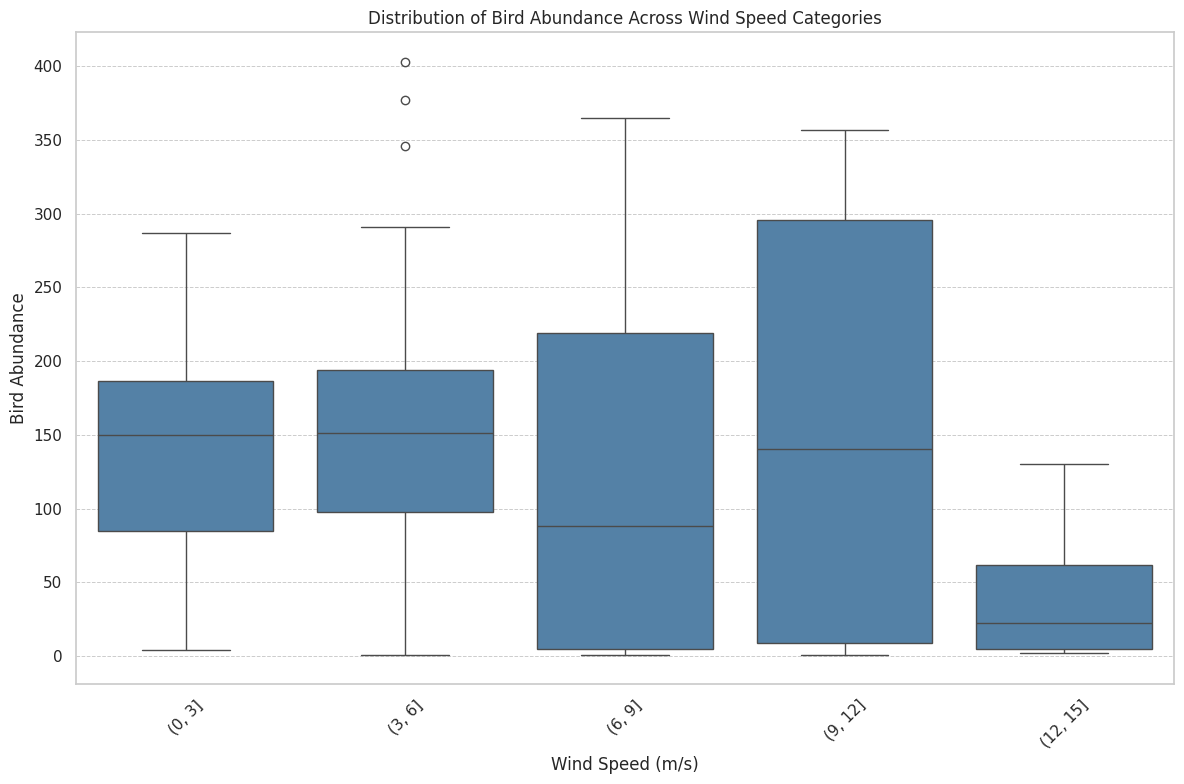

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/content/UPDATED_FINAL_OUTPUT_WIND.csv'
df = pd.read_csv(file_path)


df['Dates'] = pd.to_datetime(df['Dates'])
df['Times'] = pd.to_datetime(df['Times'], format='%H:%M:%S').dt.time
df['Datetime'] = pd.to_datetime(df['Dates'].astype(str) + ' ' + df['Times'].astype(str))
df['Wind_Speed'] = np.sqrt(df['u']**2 + df['v']**2)
df_filtered = df[df['Wind_Speed'] <= 15]
daily_data = df_filtered.groupby('Dates').agg({'Wind_Speed': 'mean', 'Bird_Number': 'sum'}).reset_index()
plt.figure(figsize=(12, 8))
box_plot = sns.boxplot(x=pd.cut(daily_data['Wind_Speed'], bins=np.arange(0, 16, 3)),
                       y=daily_data['Bird_Number'],
                       color='steelblue')

plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Bird Abundance')
plt.title('Distribution of Bird Abundance Across Wind Speed Categories')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


<ipython-input-12-f4747094fa7c>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Times'] = pd.to_datetime(df['Times']).dt.time


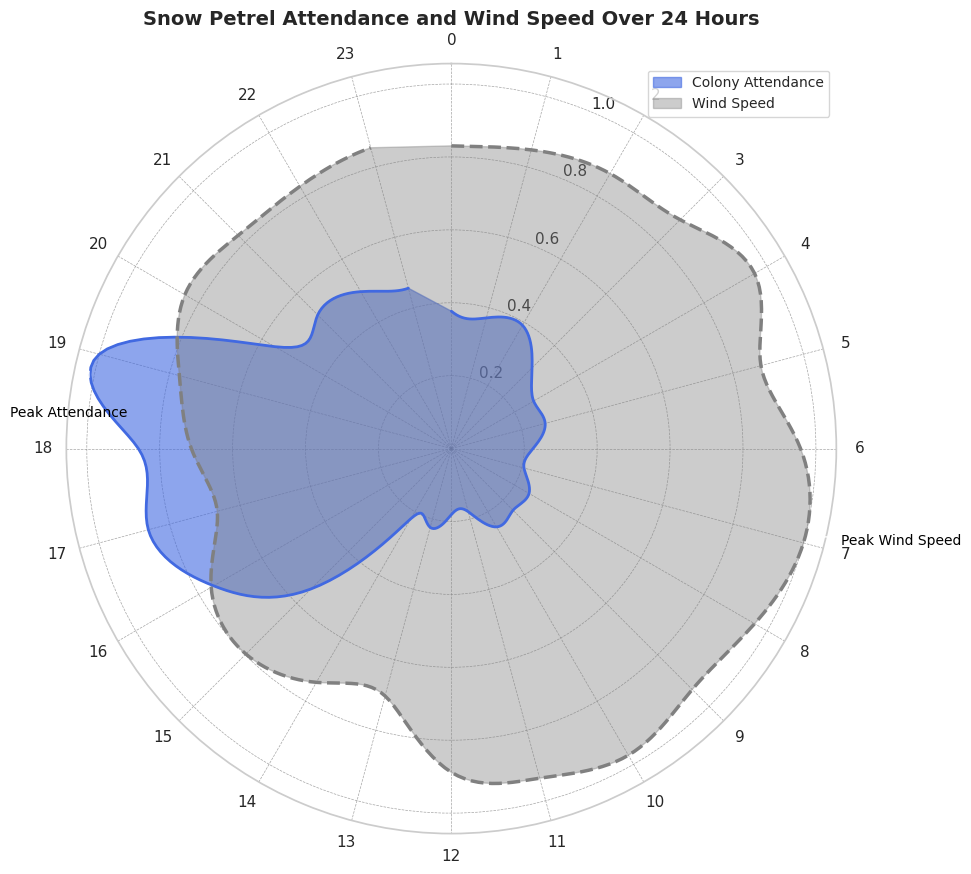

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


file_path = '/content/UPDATED_FINAL_OUTPUT_WIND.csv'
df = pd.read_csv(file_path)
df['Dates'] = pd.to_datetime(df['Dates'])
df['Times'] = pd.to_datetime(df['Times']).dt.time
df['Datetime'] = pd.to_datetime(df['Dates'].astype(str) + ' ' + df['Times'].astype(str))
df['Hour'] = df['Datetime'].dt.hour
hourly_data = df.groupby('Hour').agg({'Bird_Number': 'sum', 'u': 'mean', 'v': 'mean'}).reset_index()
hourly_data['Wind_Speed'] = np.sqrt(hourly_data['u']**2 + hourly_data['v']**2)
max_bird_number = hourly_data['Bird_Number'].max()
max_wind_speed = hourly_data['Wind_Speed'].max()
hourly_data['Bird_Number_Normalized'] = hourly_data['Bird_Number'] / max_bird_number
hourly_data['Wind_Speed_Normalized'] = hourly_data['Wind_Speed'] / max_wind_speed


angles = np.linspace(0, 2 * np.pi, len(hourly_data), endpoint=False).tolist()
hourly_data['Angle'] = angles
hourly_data = hourly_data.set_index('Angle')
angles_smooth = np.linspace(hourly_data.index.min(), hourly_data.index.max(), 300)
bird_smooth = make_interp_spline(hourly_data.index, hourly_data['Bird_Number_Normalized'])(angles_smooth)
wind_smooth = make_interp_spline(hourly_data.index, hourly_data['Wind_Speed_Normalized'])(angles_smooth)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
ax.fill(angles_smooth, bird_smooth, color='royalblue', alpha=0.6, label='Colony Attendance')
ax.plot(angles_smooth, bird_smooth, color='royalblue', linewidth=2)
ax.fill(angles_smooth, wind_smooth, color='gray', alpha=0.4, label='Wind Speed')
ax.plot(angles_smooth, wind_smooth, color='gray', linewidth=2.5, linestyle='--')

ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2)
ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))
ax.set_xticklabels(range(24))
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax.annotate('Peak Attendance',
            xy=(angles_smooth[np.argmax(bird_smooth)], bird_smooth.max()),
            xytext=(angles_smooth[np.argmax(bird_smooth)] - 0.15, bird_smooth.max() + 0.2),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=10, color='black')
ax.annotate('Peak Wind Speed',
            xy=(angles_smooth[np.argmax(wind_smooth)], wind_smooth.max()),
            xytext=(angles_smooth[np.argmax(wind_smooth)], wind_smooth.max() + 0.1),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=10, color='black')

plt.title('Snow Petrel Attendance and Wind Speed Over 24 Hours', fontsize=14, weight='bold')
plt.legend(loc='upper right', fontsize=10)

# Show plot
plt.show()
